In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split














In [11]:

pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en la salida
# Ruta del archivo
ruta_archivo = r"..\csv\raw\Csv_Todas_Columnas_Limpio.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo, decimal=',')

# Mostrar las primeras filas para comprobar
df.head()

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,deudas,fumador,actividad_fisica,vive,edad,sexo,nivel_educativo,codigo_postal,tipo_empleo_Desempleado,tipo_empleo_Privado,tipo_empleo_Público,tipo_empleo_Temporal,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,ocupacion_Desempleado,ocupacion_Empleado,ocupacion_Jubilado,region_Este,region_Norte,region_Oeste,region_Sur,continente_nacimiento_Antarctica,continente_nacimiento_Asia,continente_nacimiento_Desconocido,continente_nacimiento_Europe,continente_nacimiento_North America,continente_nacimiento_Oceania,continente_nacimiento_South America
0,1.125931,1.116180,0.518919,-0.262543,-0.924342,0.202956,-0.323535,1,1,1,0,1,0,0,0,0,0,0,0,1,1.499543,2.487493,0,1,0.0,1,0.750106,1,1.0,98471,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.549388,-1.768373,-1.357231,0.177002,-0.083060,0.709850,-0.883740,0,0,0,0,0,0,0,0,0,0,0,0,1,2.557298,-0.885562,0,0,1.0,0,-1.028843,0,2.0,23903,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,-0.436864,-0.699218,-2.059947,-0.742047,0.481094,-0.116266,2.570857,0,0,0,0,0,1,0,0,0,0,0,0,0,1.082786,-0.885562,0,1,0.0,1,1.711700,0,0.0,20094,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,-0.258148,0.287809,-0.946194,-0.552243,1.490633,-0.122279,1.030293,1,0,1,1,1,0,0,0,0,1,0,0,0,-0.009775,2.487493,0,1,0.0,0,1.182823,0,1.0,55575,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-1.940861,-1.565293,-2.566843,-1.161613,1.134325,-0.389633,-0.743689,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011400,-0.885562,0,1,1.0,1,-0.740365,1,3.0,20826,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


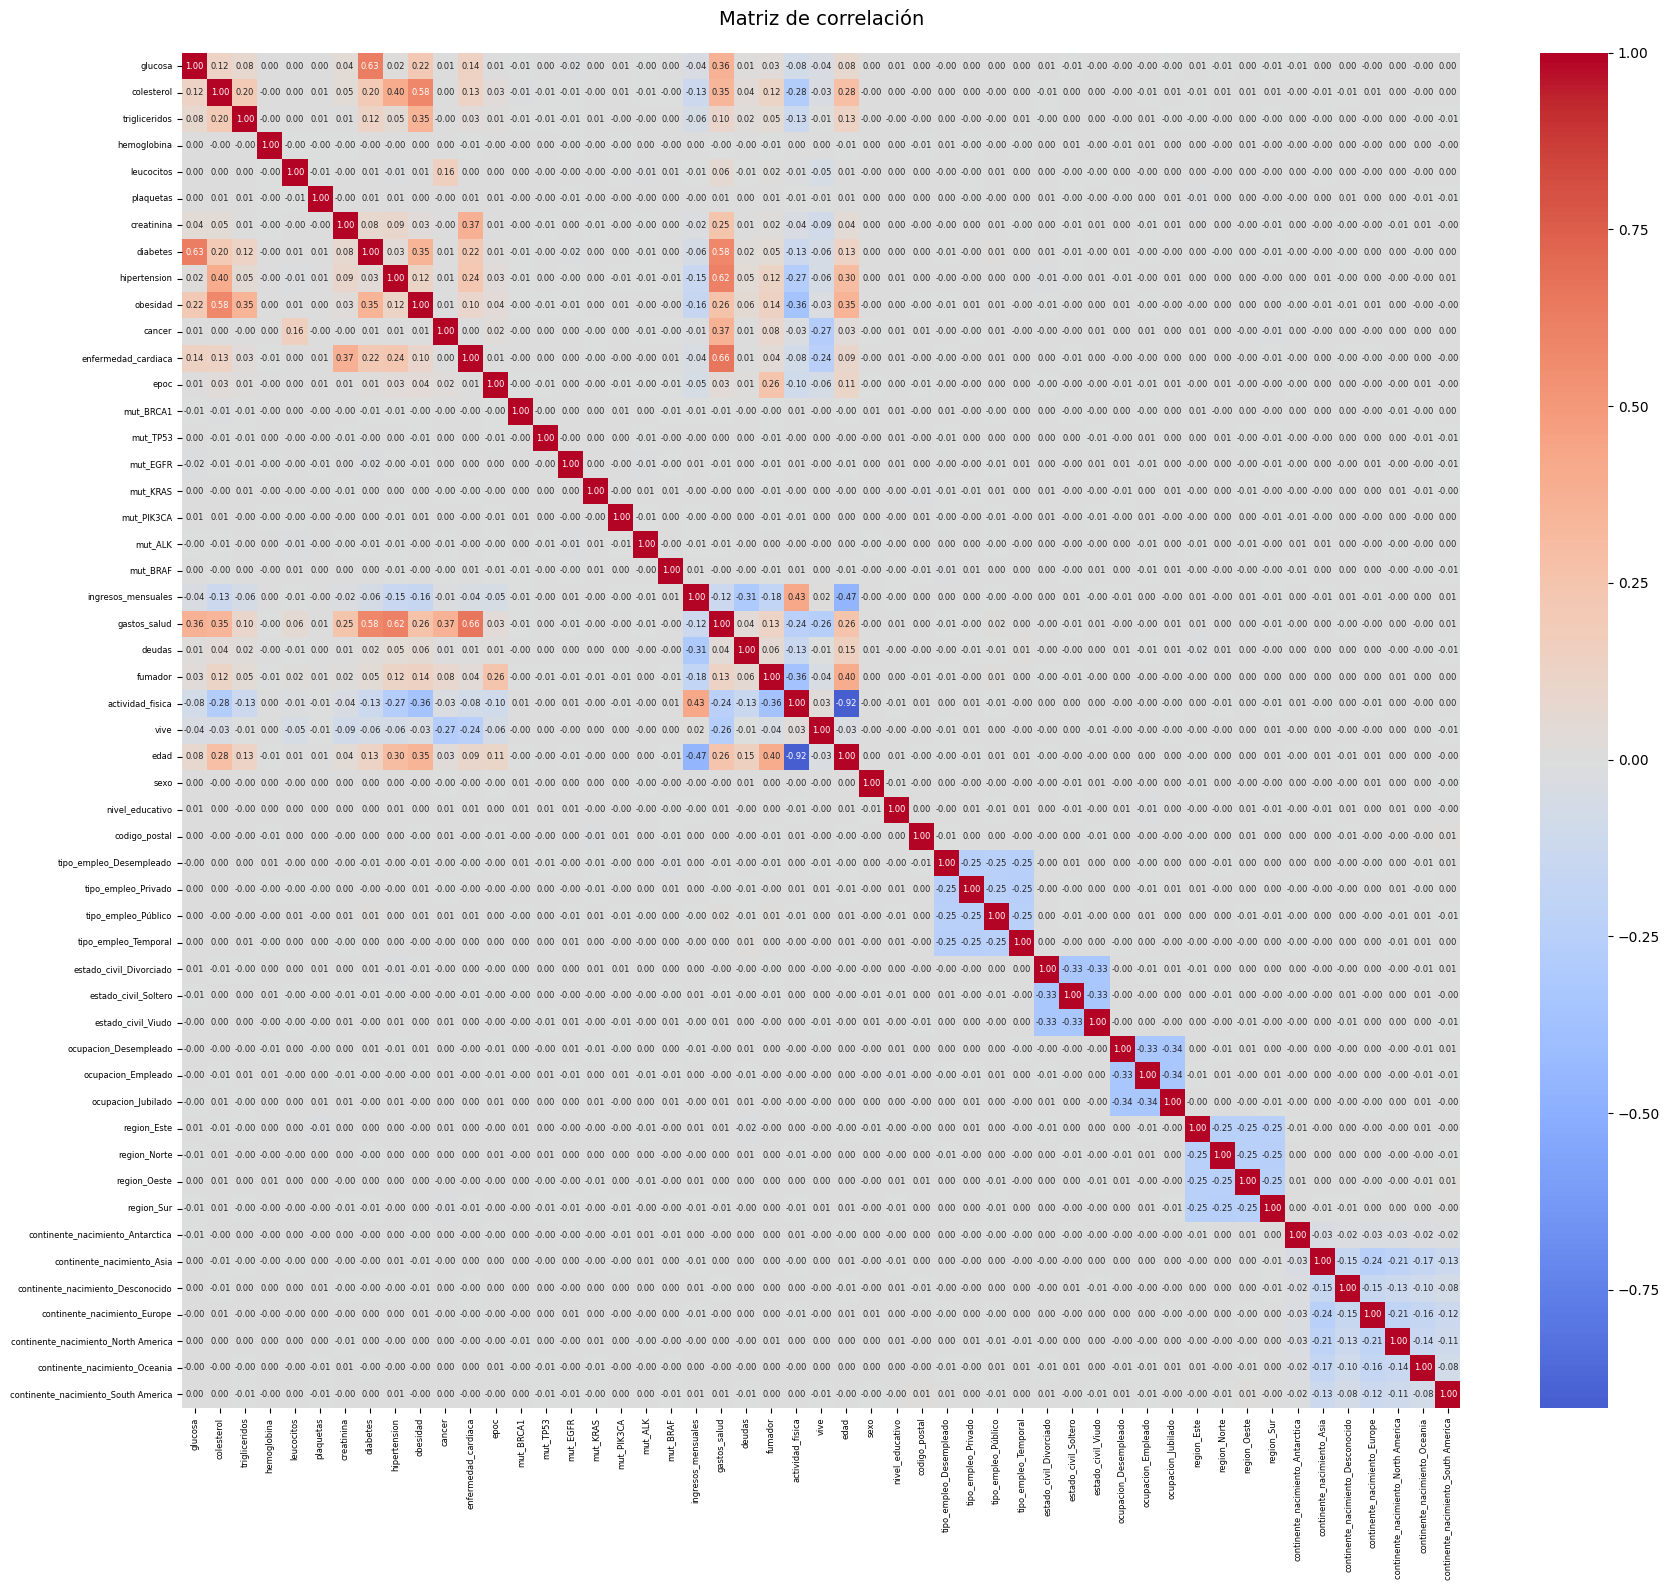

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de columnas válidas en el DataFrame
columnas = [
    'glucosa', 'colesterol', 'trigliceridos', 'hemoglobina', 'leucocitos', 'plaquetas', 'creatinina',
    'diabetes', 'hipertension', 'obesidad', 'cancer', 'enfermedad_cardiaca', 'epoc',
    'mut_BRCA1', 'mut_TP53', 'mut_EGFR', 'mut_KRAS', 'mut_PIK3CA', 'mut_ALK', 'mut_BRAF',
    'ingresos_mensuales', 'gastos_salud', 'deudas', 'fumador', 'actividad_fisica', 'vive', 'edad', 'sexo',
    'nivel_educativo', 'codigo_postal',
    'tipo_empleo_Desempleado', 'tipo_empleo_Privado', 'tipo_empleo_Público', 'tipo_empleo_Temporal',
    'estado_civil_Divorciado', 'estado_civil_Soltero', 'estado_civil_Viudo',
    'ocupacion_Desempleado', 'ocupacion_Empleado', 'ocupacion_Jubilado',
    'region_Este', 'region_Norte', 'region_Oeste', 'region_Sur',
    'continente_nacimiento_Antarctica', 'continente_nacimiento_Asia', 'continente_nacimiento_Desconocido',
    'continente_nacimiento_Europe', 'continente_nacimiento_North America',
    'continente_nacimiento_Oceania', 'continente_nacimiento_South America'
]
columnas_validas = [col for col in columnas if col in df.columns]

# Calcular correlación
matriz_correlacion = df[columnas_validas].corr()

# Graficar heatmap compacto con anotaciones pequeñas
plt.figure(figsize=(18, 16))
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True,
    annot_kws={"size": 6}  # tamaño pequeño de texto
)

plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)
plt.title("Matriz de correlación", fontsize=14, pad=20)
plt.tight_layout()
plt.show()



In [41]:
import pandas as pd

# Asumimos que el DataFrame df ya existe y contiene la columna 'vive'
# Calculamos la correlación de todas las columnas numéricas con 'vive'
correlaciones = df.corr(numeric_only=True)['vive'].sort_values(key=abs, ascending=False)

# Mostramos las 15 columnas con mayor correlación (positiva o negativa) con 'vive'
correlaciones_mas_fuertes = correlaciones.drop('vive').head(51)
correlaciones_mas_fuertes


cancer                                -0.272906
gastos_salud                          -0.262333
enfermedad_cardiaca                   -0.242263
creatinina                            -0.087198
epoc                                  -0.062929
hipertension                          -0.060034
diabetes                              -0.056181
leucocitos                            -0.052074
fumador                               -0.042654
glucosa                               -0.035429
colesterol                            -0.034901
edad                                  -0.031451
actividad_fisica                       0.030640
obesidad                              -0.029257
ingresos_mensuales                     0.017886
continente_nacimiento_South America   -0.010068
trigliceridos                         -0.009379
tipo_empleo_Privado                    0.009271
estado_civil_Viudo                    -0.006747
region_Sur                             0.006456
deudas                                -0

In [12]:
# quiero saber el numero de filas y columnas de df
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 50000 filas y 51 columnas.


In [157]:
y_train.value_counts()

vive
1    34912
0     5088
Name: count, dtype: int64

In [231]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers



# Separar características y etiqueta
y = df['vive']
"""X = df[['actividad_fisica', 'ingresos_mensuales', 'region_Sur', 'mut_BRAF', 'hemoglobina', 'mut_PIK3CA', 'estado_civil_Soltero', 'mut_KRAS', 'region_Oeste', 'mut_TP53', 'obesidad', 'edad', 'colesterol', 'glucosa', 'fumador', 'leucocitos', 'diabetes', 'hipertension', 'epoc', 'creatinina', 'enfermedad_cardiaca', 'gastos_salud', 'cancer']]
"""
"""X = df[['cancer', 'gastos_salud', 'enfermedad_cardiaca', 'creatinina', 'epoc', 'hipertension', 'diabetes', 'leucocitos', 'fumador', 'glucosa', 'colesterol', 'edad', 'actividad_fisica', 'obesidad', 'ingresos_mensuales']]
"""
X = df[['cancer', 'gastos_salud', 'enfermedad_cardiaca', 'creatinina', 'epoc', 'hipertension', 'diabetes', 'leucocitos', 'fumador', 'glucosa', 'colesterol', 'edad', 'actividad_fisica', 'obesidad', 'ingresos_mensuales', 'continente_nacimiento_South America', 'trigliceridos', 'tipo_empleo_Privado', 'estado_civil_Viudo', 'region_Sur', 'deudas', 'tipo_empleo_Desempleado', 'plaquetas', 'ocupacion_Jubilado', 'mut_BRAF', 'hemoglobina', 'mut_PIK3CA', 'region_Norte', 'mut_BRCA1', 'nivel_educativo', 'mut_ALK', 'tipo_empleo_Público']]

# División y SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(36, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# Compilación
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Callback de early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # métrica que se observa
    patience=7,           # número de epochs sin mejora antes de parar
    restore_best_weights=True  # recupera los pesos del mejor epoch
)
#
# Entrenamiento con early stopping
history = model.fit(
    X_train_smote, y_train_smote,
    epochs=50,  # ahora puedes poner un número alto, el early stop lo detendrá antes
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)


Epoch 1/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6870 - loss: 0.6392 - val_accuracy: 0.7073 - val_loss: 0.6059
Epoch 2/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7837 - loss: 0.5088 - val_accuracy: 0.7406 - val_loss: 0.5413
Epoch 3/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7938 - loss: 0.4825 - val_accuracy: 0.7497 - val_loss: 0.5281
Epoch 4/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8023 - loss: 0.4615 - val_accuracy: 0.8079 - val_loss: 0.4252
Epoch 5/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8047 - loss: 0.4541 - val_accuracy: 0.7630 - val_loss: 0.4976
Epoch 6/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8079 - loss: 0.4467 - val_accuracy: 0.7554 - val_loss: 0.5102
Epoch 7/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8062 - loss: 0.4451 - val_accuracy: 0.7820 - val_loss: 0.4550
Epoch 8/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8090 - loss: 0.4388 - val_accuracy: 0.

In [201]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Separar características y etiqueta
y = df['vive']
X = df[[
    "cancer",    "enfermedad_cardiaca",
    "epoc",    "diabetes",    "hipertension",    "edad",    "actividad_fisica",    "fumador",    "obesidad",    "creatinina",
    "colesterol",    "glucosa",    "leucocitos",    "hemoglobina",    "plaquetas",    "trigliceridos",    "gastos_salud",    "ingresos_mensuales",
    "nivel_educativo","tipo_empleo_Desempleado"
]]


# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Under-sampling para balancear clases
under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(14, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(7, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilación
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Callback de early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# Entrenamiento
history = model.fit(
    X_train_smote, y_train_smote,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6466 - loss: 0.6753 - val_accuracy: 0.6362 - val_loss: 0.7990
Epoch 2/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7395 - loss: 0.5738 - val_accuracy: 0.6929 - val_loss: 0.7095
Epoch 3/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7571 - loss: 0.5464 - val_accuracy: 0.7171 - val_loss: 0.6454
Epoch 4/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7662 - loss: 0.5281 - val_accuracy: 0.6812 - val_loss: 0.6949
Epoch 5/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7698 - loss: 0.5133 - val_accuracy: 0.7170 - val_loss: 0.6191
Epoch 6/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7711 - loss: 0.5060 - val_accuracy: 0.6944 - val_loss: 0.6596
Epoch 7/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7738 - loss: 0.5027 - val_accuracy: 0.6743 - val_loss: 0.7096
Epoch 8/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7733 - loss: 0.5008 - val_accuracy: 0.

In [232]:

# Predicciones
y_pred = (model.predict(X_test) >= 0.5).astype(int)


# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de confusión:
 [[ 436  892]
 [1048 7624]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.29      0.33      0.31      1328
           1       0.90      0.88      0.89      8672

    accuracy                           0.81     10000
   macro avg       0.59      0.60      0.60     10000
weighted avg       0.82      0.81      0.81     10000



In [183]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from collections import Counter

# Separar características y etiqueta
X = df[['actividad_fisica', 'ingresos_mensuales', 'region_Sur', 'mut_BRAF', 'hemoglobina', 'mut_PIK3CA', 'estado_civil_Soltero', 'mut_KRAS', 'region_Oeste', 'mut_TP53', 'obesidad', 'edad', 'colesterol', 'glucosa', 'fumador', 'leucocitos', 'diabetes', 'hipertension', 'epoc', 'creatinina', 'enfermedad_cardiaca', 'gastos_salud', 'cancer']]
y = df['vive']
# SMOTE para balancear
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# One-hot encoding de las etiquetas
y_train_cat = to_categorical(y_train_smote, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(36, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(2, activation='softmax')  # <- 2 salidas
])

# Compilación
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Callback de early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# Entrenamiento
history = model.fit(
    X_train_smote, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6925 - loss: 0.6373 - val_accuracy: 0.6611 - val_loss: 0.8902
Epoch 2/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7410 - loss: 0.5721 - val_accuracy: 0.6756 - val_loss: 0.8273
Epoch 3/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7415 - loss: 0.5610 - val_accuracy: 0.6929 - val_loss: 0.7547
Epoch 4/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7472 - loss: 0.5531 - val_accuracy: 0.6995 - val_loss: 0.7346
Epoch 5/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7514 - loss: 0.5453 - val_accuracy: 0.6770 - val_loss: 0.7864
Epoch 6/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7488 - loss: 0.5477 - val_accuracy: 0.6725 - val_loss: 0.8321
Epoch 7/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7499 - loss: 0.5460 - val_accuracy: 0.6847 - val_loss: 0.7953
Epoch 8/50
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7475 - loss: 0.5469 - val_accuracy: 0.

In [184]:
# Predicciones
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
print("Reporte de clasificación:\n", classification_report(y_true, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Matriz de confusión:
 [[ 907  421]
 [1967 6705]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.32      0.68      0.43      1328
           1       0.94      0.77      0.85      8672

    accuracy                           0.76     10000
   macro avg       0.63      0.73      0.64     10000
weighted avg       0.86      0.76      0.79     10000



In [186]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from collections import Counter

# Separar características y etiqueta
X = df[['actividad_fisica', 'ingresos_mensuales', 'region_Sur', 'mut_BRAF', 'hemoglobina', 'mut_PIK3CA',
        'estado_civil_Soltero', 'mut_KRAS', 'region_Oeste', 'mut_TP53', 'obesidad', 'edad',
        'colesterol', 'glucosa', 'fumador', 'leucocitos', 'diabetes', 'hipertension', 'epoc',
        'creatinina', 'enfermedad_cardiaca', 'gastos_salud', 'cancer']]
y = df['vive']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersampling para balancear las clases
under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

# Verificar nueva distribución
print("Distribución tras el undersampling:", Counter(y_train_under))

# One-hot encoding de las etiquetas
y_train_cat = to_categorical(y_train_under, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(36, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 salidas
])

# Compilación
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Callback de early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# Entrenamiento
history = model.fit(
    X_train_under, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")


Distribución tras el undersampling: Counter({0: 5088, 1: 5088})
Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5526 - loss: 0.7420 - val_accuracy: 0.3949 - val_loss: 0.9386
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - loss: 0.6476 - val_accuracy: 0.6125 - val_loss: 0.8903
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7082 - loss: 0.6186 - val_accuracy: 0.6739 - val_loss: 0.8587
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.6136 - val_accuracy: 0.6979 - val_loss: 0.8701
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.6000 - val_accuracy: 0.7078 - val_loss: 0.8943
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7072 - loss: 0.6025 - val_accuracy: 0.7485 - val_loss: 0.7919
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.5807 - val_accuracy: 0.7436 - val_loss: 0.8235
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 

In [187]:
# Predicciones
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
print("Reporte de clasificación:\n", classification_report(y_true, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
Matriz de confusión:
 [[ 953  375]
 [2210 6462]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.30      0.72      0.42      1328
           1       0.95      0.75      0.83      8672

    accuracy                           0.74     10000
   macro avg       0.62      0.73      0.63     10000
weighted avg       0.86      0.74      0.78     10000



In [190]:
from imblearn.under_sampling import RandomUnderSampler



# Separar características y etiqueta
y = df['vive']
X = df[['actividad_fisica', 'ingresos_mensuales', 'region_Sur', 'mut_BRAF', 'hemoglobina', 'mut_PIK3CA', 'estado_civil_Soltero', 'mut_KRAS', 'region_Oeste', 'mut_TP53', 'obesidad', 'edad', 'colesterol', 'glucosa', 'fumador', 'leucocitos', 'diabetes', 'hipertension', 'epoc', 'creatinina', 'enfermedad_cardiaca', 'gastos_salud', 'cancer']]

"""X = df[['cancer', 'gastos_salud', 'enfermedad_cardiaca', 'creatinina', 'epoc', 'hipertension', 'diabetes', 'leucocitos', 'fumador', 'glucosa', 'colesterol', 'edad', 'actividad_fisica', 'obesidad', 'ingresos_mensuales']]
"""
"""X = df[['cancer', 'gastos_salud', 'enfermedad_cardiaca', 'creatinina', 'epoc', 'hipertension', 'diabetes', 'leucocitos', 'fumador', 'glucosa', 'colesterol', 'edad', 'actividad_fisica', 'obesidad', 'ingresos_mensuales', 'continente_nacimiento_South America', 'trigliceridos', 'tipo_empleo_Privado', 'estado_civil_Viudo', 'region_Sur', 'deudas', 'tipo_empleo_Desempleado', 'plaquetas', 'ocupacion_Jubilado', 'mut_BRAF', 'hemoglobina', 'mut_PIK3CA', 'region_Norte', 'mut_BRCA1', 'nivel_educativo', 'mut_ALK', 'tipo_empleo_Público']]
"""
# División y SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)



model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(26, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(13, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(6, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# Compilación
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Callback de early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # métrica que se observa
    patience=15,           # número de epochs sin mejora antes de parar
    restore_best_weights=True  # recupera los pesos del mejor epoch
)
#
# Entrenamiento con early stopping
history = model.fit(
    X_train_under, y_train_under,
    epochs=50,  # ahora puedes poner un número alto, el early stop lo detendrá antes
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)



Epoch 1/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6096 - loss: 0.6841 - val_accuracy: 0.4985 - val_loss: 0.9718
Epoch 2/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6927 - loss: 0.6144 - val_accuracy: 0.6714 - val_loss: 0.8735
Epoch 3/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7152 - loss: 0.6032 - val_accuracy: 0.7308 - val_loss: 0.8100
Epoch 4/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7192 - loss: 0.5866 - val_accuracy: 0.7284 - val_loss: 0.7918
Epoch 5/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7272 - loss: 0.5799 - val_accuracy: 0.7382 - val_loss: 0.8060
Epoch 6/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7235 - loss: 0.5830 - val_accuracy: 0.7225 - val_loss: 0.8277
Epoch 7/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7286 - loss: 0.5677 - val_accuracy: 0.7412 - val_loss: 0.8236
Epoch 8/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7370 - loss: 0.5569 - val_accuracy: 0.

In [192]:

# Predicciones
y_pred = (model.predict(X_test) >= 0.5).astype(int)


# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
Matriz de confusión:
 [[ 953  375]
 [2215 6457]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.30      0.72      0.42      1328
           1       0.95      0.74      0.83      8672

    accuracy                           0.74     10000
   macro avg       0.62      0.73      0.63     10000
weighted avg       0.86      0.74      0.78     10000



In [234]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers



# Separar características y etiqueta
y = df['vive']
"""X = df[['actividad_fisica', 'ingresos_mensuales', 'region_Sur', 'mut_BRAF', 'hemoglobina', 'mut_PIK3CA', 'estado_civil_Soltero', 'mut_KRAS', 'region_Oeste', 'mut_TP53', 'obesidad', 'edad', 'colesterol', 'glucosa', 'fumador', 'leucocitos', 'diabetes', 'hipertension', 'epoc', 'creatinina', 'enfermedad_cardiaca', 'gastos_salud', 'cancer']]
"""
"""X = df[['cancer', 'gastos_salud', 'enfermedad_cardiaca', 'creatinina', 'epoc', 'hipertension', 'diabetes', 'leucocitos', 'fumador', 'glucosa', 'colesterol', 'edad', 'actividad_fisica', 'obesidad', 'ingresos_mensuales']]
"""
X = df[['cancer', 'gastos_salud', 'enfermedad_cardiaca', 'creatinina', 'epoc', 'hipertension', 'diabetes', 'leucocitos', 'fumador', 'glucosa', 'colesterol', 'edad', 'actividad_fisica', 'obesidad', 'ingresos_mensuales', 'continente_nacimiento_South America', 'trigliceridos', 'tipo_empleo_Privado', 'estado_civil_Viudo', 'region_Sur', 'deudas', 'tipo_empleo_Desempleado', 'plaquetas', 'ocupacion_Jubilado', 'mut_BRAF', 'hemoglobina', 'mut_PIK3CA', 'region_Norte', 'mut_BRCA1', 'nivel_educativo', 'mut_ALK', 'tipo_empleo_Público']]

# División y SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Paso 1: oversample clase 0 hasta 5100 (minoritaria)
smote = SMOTE(sampling_strategy={0: 36000}, random_state=42)

# Paso 2: undersample clase 1 hasta 5100
under = RandomUnderSampler(sampling_strategy={1: 34000}, random_state=42)

# Pipeline
resample_pipeline = Pipeline([
    ('smote', smote),
    ('under', under)
])

# Aplicar resampling
X_train_resampled, y_train_resampled = resample_pipeline.fit_resample(X_train, y_train)
print("Distribución después del resampleo:", Counter(y_train_resampled))


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(36, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# Compilación
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Callback de early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # métrica que se observa
    patience=7,           # número de epochs sin mejora antes de parar
    restore_best_weights=True  # recupera los pesos del mejor epoch
)
#
# Entrenamiento con early stopping
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=50,  # ahora puedes poner un número alto, el early stop lo detendrá antes
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)




Distribución después del resampleo: Counter({0: 36000, 1: 34000})
Epoch 1/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6588 - loss: 0.6448 - val_accuracy: 0.6406 - val_loss: 0.7615
Epoch 2/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7951 - loss: 0.4753 - val_accuracy: 0.7291 - val_loss: 0.6210
Epoch 3/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8054 - loss: 0.4488 - val_accuracy: 0.7389 - val_loss: 0.5998
Epoch 4/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8089 - loss: 0.4334 - val_accuracy: 0.7571 - val_loss: 0.5634
Epoch 5/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8164 - loss: 0.4224 - val_accuracy: 0.6976 - val_loss: 0.6545
Epoch 6/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8190 - loss: 0.4145 - val_accuracy: 0.7486 - val_loss: 0.5526
Epoch 7/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8194 - loss: 0.4159 - val_accuracy: 0.6980 - val_loss: 0.6403
Epoch 8/50
875/875 ━━━━━━━━━━━━━━━━━━━

In [229]:

# Predicciones
y_pred = (model.predict(X_test) >= 0.4).astype(int)


# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de confusión:
 [[ 482  846]
 [1279 7393]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.27      0.36      0.31      1328
           1       0.90      0.85      0.87      8672

    accuracy                           0.79     10000
   macro avg       0.59      0.61      0.59     10000
weighted avg       0.81      0.79      0.80     10000



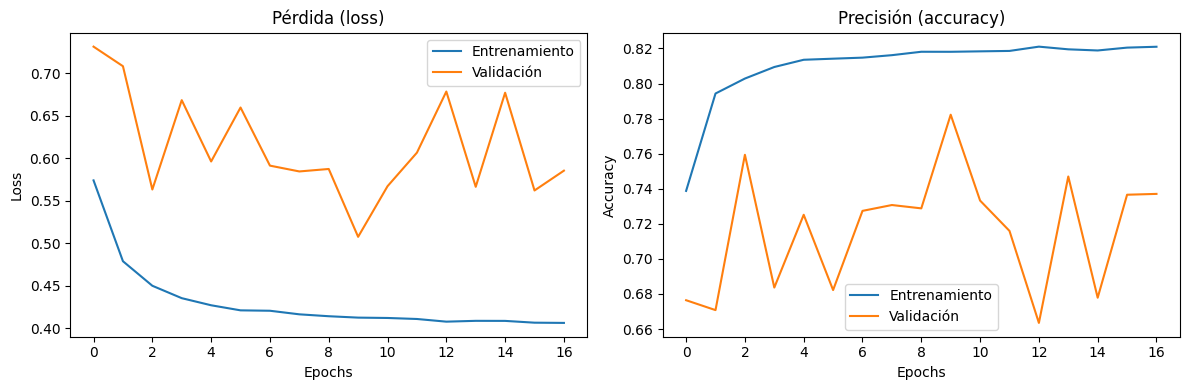

In [230]:
import matplotlib.pyplot as plt



# --- Añade esto para visualizar ---
plt.figure(figsize=(12, 4))


# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión (accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt



# --- Añade esto para visualizar ---
plt.figure(figsize=(12, 4))


# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión (accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

# Separar características y etiqueta
X = df.drop(columns='vive')
y = df['vive']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = dict(enumerate(class_weights))

# Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilación con Focal Loss
model.compile(optimizer='adam',
              loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.25, gamma=2.0),
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train, y_train, epochs=5, batch_size=16,
                    validation_split=0.2, class_weight=class_weights, verbose=0)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predicciones
y_pred = (model.predict(X_test) >= 0.5).astype(int)

# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.19.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file

ModuleNotFoundError: No module named 'keras.src.engine'

In [ ]:
# Aquí asume que ya tienes X_train_smote, y_train_smote definidos con SMOTE

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_smote.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_smote, y_train_smote, epochs=5, batch_size=16,
                    validation_split=0.2, verbose=0)

test_loss, test_acc = model.evaluate(X_test, y_test)

y_pred = (model.predict(X_test) >= 0.5).astype(int)

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


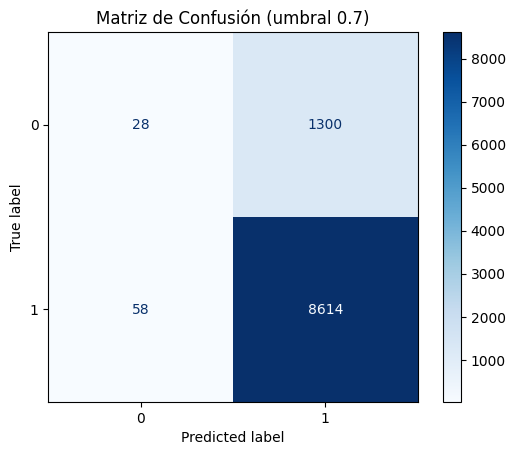

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predecir probabilidades
y_probs = model.predict(X_test)

# Aplicar un umbral más alto, por ejemplo 0.7 en vez de 0.5
y_pred = (y_probs >= 0.9).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (umbral 0.7)")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


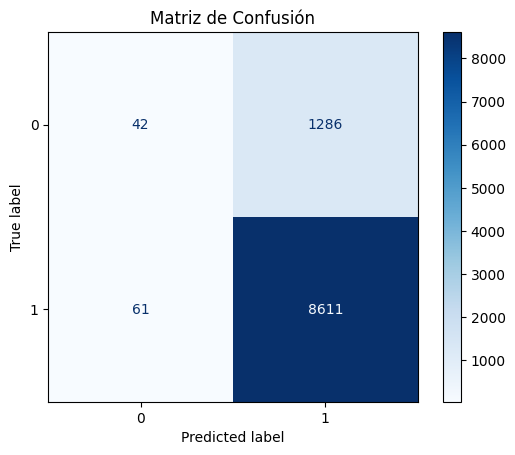

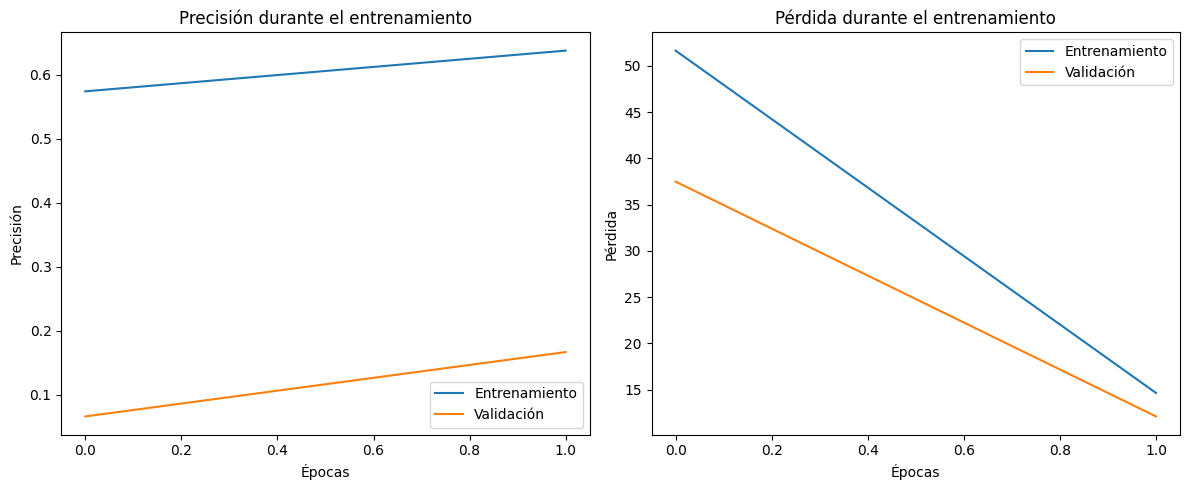

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob >= 0.7).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión")
plt.show()

# Historial de entrenamiento
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()
